##Cài đặt gói wfdb để đọc định dạng dữ liệu từ Physionet

In [1]:
pip install wfdb

     |████████████████████████████████| 122kB 5.3MB/s 


# Install github của wfdb với sample-data online

In [2]:
! git clone https://github.com/MIT-LCP/wfdb-python.git

Cloning into 'wfdb-python'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 4256 (delta 63), reused 54 (delta 30), pack-reused 4140
Receiving objects: 100% (4256/4256), 149.52 MiB | 23.04 MiB/s, done.
Resolving deltas: 100% (2793/2793), done.
Checking out files: 100% (218/218), done.


Nhập các gói thư viện cần thiết cho demo

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

## Demo 1

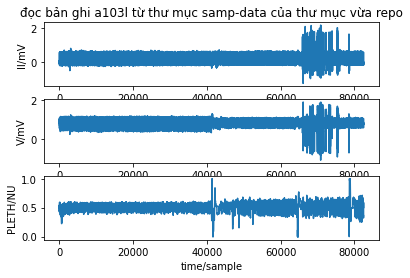

{'adc_gain': [7247.0, 10520.0, 12530.0],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0],
 'block_size': [0, 0, 0],
 'byte_offset': [24, 24, 24],
 'checksum': [-27403, -301, -17391],
 'comments': ['Asystole', 'False alarm'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'fs': 250,
 'init_value': [-171, 9127, 6042],
 'n_sig': 3,
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'record_name': 'a103l',
 'samps_per_frame': [1, 1, 1],
 'sig_len': 82500,
 'sig_name': ['II', 'V', 'PLETH'],
 'skew': [None, None, None],


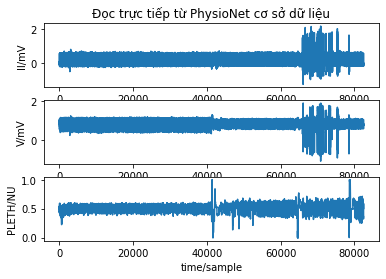

{'adc_gain': [7247.0, 10520.0, 12530.0],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0],
 'block_size': [0, 0, 0],
 'byte_offset': [24, 24, 24],
 'checksum': [-27403, -301, -17391],
 'comments': ['Asystole', 'False alarm'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'fs': 250,
 'init_value': [-171, 9127, 6042],
 'n_sig': 3,
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'record_name': 'a103l',
 'samps_per_frame': [1, 1, 1],
 'sig_len': 82500,
 'sig_name': ['II', 'V', 'PLETH'],
 'skew': [None, None, None],


In [7]:
# Demo 1 - Đọc một bản ghi WFDB sử dụng 'rdrecord' vào a wfdb.Record đối tượng.
# Vẽ các tín hiệu, và biểu diễn dữ liệu.
record = wfdb.rdrecord('wfdb-python/sample-data/a103l') 
wfdb.plot_wfdb(record=record, title='đọc bản ghi a103l từ thư mục samp-data của thư mục vừa repo') 
display(record.__dict__)

# Có thể đọc cùng files trên cơ sở dữ liệu của Physionet https://physionet.org/content/challenge-2015/1.0.0
# trong thư mục con  /training/ database 
record2 = wfdb.rdrecord('a103l', pn_dir='challenge-2015/training/')
wfdb.plot_wfdb(record=record2, title='Đọc trực tiếp từ PhysioNet cơ sở dữ liệu') 
display(record2.__dict__)

## Demo 2

In [16]:
# Demo 2 - Đọc một số kênh và một khoảng dữ liệu sử dụng hàm đơn giản hóa 'rdsamp' 
# hàm này trả về một mảng numpy và một từ điển. Mô tả dữ liệu
signals, fields = wfdb.rdsamp('wfdb-python/sample-data/s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)
print("================================================================================")
print("                            Đọc Trực Tiếp Trên Physionet                        ")
print("================================================================================")
# Có thể đọc từ cùng tệp dữ liệu có sẵn trên Physionet
signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')

display(signals2)
display(fields2)

array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ...,
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'base_date': None,
 'base_time': None,
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n/a',
  'Pulmonary artery pressu

                            Đọc Trực Tiếp Trên Physionet                        


array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ...,
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'base_date': None,
 'base_time': None,
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n/a',
  'Pulmonary artery pressu

## Demo 3

In [15]:
# Demo 3 - Chỉ đọc một đầu mục WFDB  (không bao gồm dữ liệu tín hiệu)
record = wfdb.rdheader('wfdb-python/sample-data/drive02')
display(record.__dict__)

print("================================================================================")
print("                            Đọc Trực Tiếp Trên Physionet                        ")
print("================================================================================")
# Có thể đọc cùng tệp này trên Physionet
record2 = wfdb.rdheader('drive02', pn_dir='drivedb')
display(record2.__dict__)

{'adc_gain': [1000.0, 1000.0, 1.0001, 100.0, 500.0],
 'adc_res': [16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None],
 'checksum': [14736, 13501, -19070, -9226, -14191],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat'],
 'fmt': ['16', '16', '16', '16', '16'],
 'fs': 15.5,
 'init_value': [-1236, 1802, 75, 0, 5804],
 'n_sig': 5,
 'p_signal': None,
 'record_name': 'drive02',
 'samps_per_frame': [32, 2, 1, 1, 2],
 'sig_len': 78056,
 'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
 'skew': [None, None, None, None, None],
 'units': ['mV', 'mV', 'bpm', 'mV', 'mV']}

                            Đọc Trực Tiếp Trên Physionet                        


{'adc_gain': [1000.0, 1000.0, 1.0001, 100.0, 500.0],
 'adc_res': [16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None],
 'checksum': [14736, 13501, -19070, -9226, -14191],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat'],
 'fmt': ['16', '16', '16', '16', '16'],
 'fs': 15.5,
 'init_value': [-1236, 1802, 75, 0, 5804],
 'n_sig': 5,
 'p_signal': None,
 'record_name': 'drive02',
 'samps_per_frame': [32, 2, 1, 1, 2],
 'sig_len': 78056,
 'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
 'skew': [None, None, None, None, None],
 'units': ['mV', 'mV', 'bpm', 'mV', 'mV']}

## Demo 4

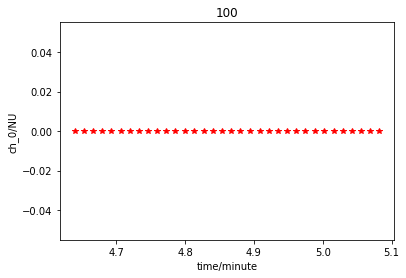

                            Đọc Trực Tiếp Trên Physionet                        


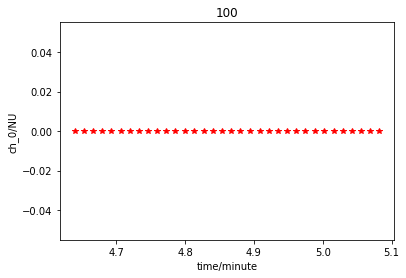

In [18]:
# Demo 4 - Đọc một phần của tệp chú thích WFDB dưới dạng một đối tượng có tên wfdb.Annotation, và biểu diễn các mẫu dữ liệu
annotation = wfdb.rdann('wfdb-python/sample-data/100', 'atr', sampfrom=100000, sampto=110000)
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

print("================================================================================")
print("                            Đọc Trực Tiếp Trên Physionet                        ")
print("================================================================================")
# Cũng có để đọc cùng tệp trên PhysioNet
annotation2 = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pn_dir='mitdb')
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation2, time_units='minutes')

## Demo 5

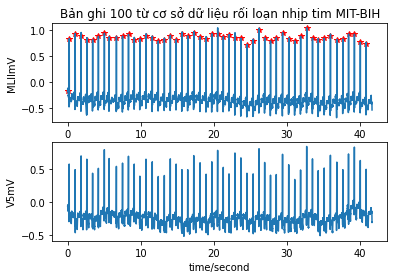

                            Đọc Trực Tiếp Trên Physionet                        


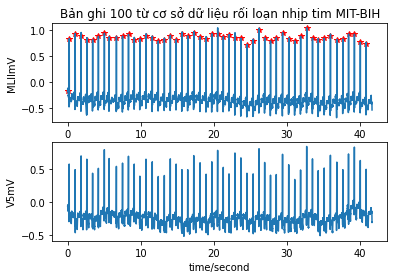

In [25]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
# Demo 5 - Đọc một bản ghi WFDB và chú thích của nó. Vẽ tất cả các kênh và chú thích trên kênh 0
record = wfdb.rdrecord('wfdb-python/sample-data/100', sampto = 15000)
annotation = wfdb.rdann('wfdb-python/sample-data/100', 'atr', sampto = 15000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Bản ghi 100 từ cơ sở dữ liệu rối loạn nhịp tim MIT-BIH',
               time_units='seconds')
print("================================================================================")
print("                            Đọc Trực Tiếp Trên Physionet                        ")
print("================================================================================")
# Đọc trực tiếp từ cơ sở dữ liệu trên Physionet
record2 = wfdb.rdrecord('100', sampto=15000, pn_dir='mitdb')
annotation2 = wfdb.rdann('100', 'atr', sampto = 15000, pn_dir='mitdb')

wfdb.plot_wfdb(record=record2, annotation=annotation2,
               title='Bản ghi 100 từ cơ sở dữ liệu rối loạn nhịp tim MIT-BIH',
               time_units='seconds')

# Các ví dụ đọc dữ liệu chứa các kênh đa mẫu/khung

Mặc dù chỉ có thể có một tần số lấy mẫu với mỗi bản ghi, một bản ghi WFDB có thể lưu nhiều kênh với các tần số lấy mẫu khác nhau, chừng nào các tần số lấy mẫu có thể biểu diễn dưới dạng bội số của tần số lấy mẫu cơ bản, điều này thể hiện số lượng mẫu với mỗi kênh xuất hiện trong mỗi khung.

Vi dụ lấy tín hiệu với tần số lấy mẫu 120, 240, và 360 Hz trong một bản ghi đơn, chúng có thể kết hợp vào một bản ghi với fs=120 và samps_per_frame = [1, 2, 3].

## Lựa chọn đọc
Gói này cho phép tín hiệu trong bản ghi với nhiều mẫu/khung có thể đọc theo hai cách
1. smoothed- một mxn đồng nhất numpy được trả về như một trường d_signal hay p_signal. Các kênh với nhiều mẫu/khung có giá trị trung bình trong mỗi khung. Đây như hành vi của hàm *rdsamp* từ gói WFDB gốc. Chú ý rằng wfdb.plot_record chỉ làm việc nếu đối tượng bản ghi có trường p_signals.
2. expanded - Một danh sách mảng 1 chiều numpy được trả về dưới dạng tín hiệu e_d_signal hoặc trường e_p_signal. Tất cả mẫu từ mỗi kênh được trả về mảng numpy tương ứng. Các mảng này có chiều dài khác nhau tùy thuộc giá trị *samps_per_frame* của chúng.

Thiết lập *smooth_frames* lựa chọn (default=True) trong rdrecord để trả về kiểu tín hiệu mong muốn.

## Các ví dụ dạng sóng đa phân vùng

Các phần dưới đây tải và vẽ dạng sóng từ MIMIC tương thích với cơ sở dữ liệu dạng sóng. Các dạng sóng đó phù hợp với dữ liệu từ cơ sở y tế trong cơ sở dữ liệu MIMIC. Các bản ghi đầu vào là đa phân vùng (tạo thành nhiều bản ghi WFDB đơn) và tương đối dài.

Lưu ý là các kiểu bản ghi đó có chứa các vùng mà ở một số kênh nhất định bị lỗi. **matplotlib** tự động phóng đại vùng không bị Nans với mỗi kênh nhưng toàn khoảng thời gian của tín hiệu đầu vào **plotrec** thật sự vẽ





## Demo 6

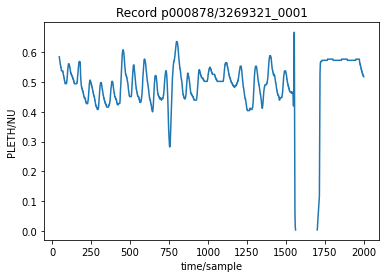

{'adc_gain': [255.0],
 'adc_res': [8],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(16, 57, 39),
 'baseline': [-128],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [-25757],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3269321_0001.dat'],
 'fmt': ['80'],
 'fs': 125,
 'init_value': [-128],
 'n_sig': 1,
 'p_signal': array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.52156863],
        [0.51764706],
        [0.51764706]]),
 'record_name': '3269321_0001',
 'samps_per_frame': [1],
 'sig_len': 2000,
 'sig_name': ['PLETH'],
 'skew': [None],
 'units': ['NU']}

                            Đọc Trực Tiếp Trên Physionet                        


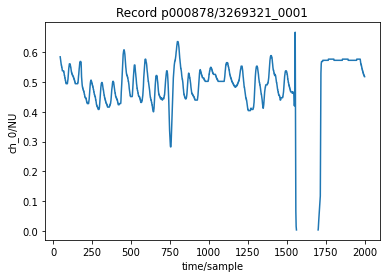

(array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.52156863],
        [0.51764706],
        [0.51764706]]),
 {'base_date': None,
  'base_time': datetime.time(16, 57, 39),
  'comments': [],
  'fs': 125,
  'n_sig': 1,
  'sig_len': 2000,
  'sig_name': ['PLETH'],
  'units': ['NU']})

In [27]:
# Demo 6 - Đọc các bản ghi có nhiều phân mảng và vẽ các sóng từ cơ sở dữ liệu khớp với MIMIC
record = wfdb.rdrecord('wfdb-python/sample-data/multi-segment/p000878/3269321_0001')
wfdb.plot_wfdb(record=record, title='Record p000878/3269321_0001') 
display(record.__dict__)

print("================================================================================")
print("                            Đọc Trực Tiếp Trên Physionet                        ")
print("================================================================================")
# Đọc tệp trực tiếp từ PhysioNet ()
signals, fields = wfdb.rdsamp('3269321_0001', pn_dir='mimic3wdb/matched/p00/p000878')
wfdb.plot_items(signal=signals, fs=fields['fs'], title='Record p000878/3269321_0001')
display((signals, fields))

## Demo 7

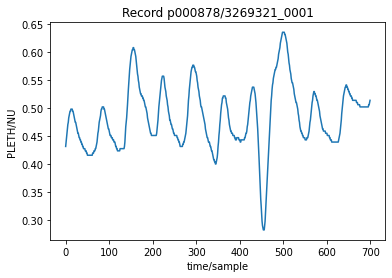

{'adc_gain': [255.0],
 'adc_res': [8],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(16, 57, 41, 400000),
 'baseline': [-128],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [62211],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3269321_0001.dat'],
 'fmt': ['80'],
 'fs': 125,
 'init_value': [-18],
 'n_sig': 1,
 'p_signal': array([[0.43137255],
        [0.43921569],
        [0.44705882],
        [0.45490196],
        [0.4627451 ],
        [0.47058824],
        [0.4745098 ],
        [0.48235294],
        [0.48627451],
        [0.49019608],
        [0.49411765],
        [0.49411765],
        [0.49803922],
        [0.49803922],
        [0.49803922],
        [0.49803922],
        [0.49411765],
        [0.49411765],
        [0.49019608],
        [0.48627451],
        [0.48235294],
        [0.47843137],
        [0.4745098 ],
        [0.4745098 ],
        [0.47058824],
  

                            Đọc Trực Tiếp Trên Physionet                        


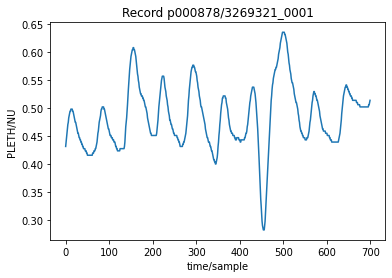

{'adc_gain': [255.0],
 'adc_res': [8],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(16, 57, 41, 400000),
 'baseline': [-128],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [62211],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3269321_0001.dat'],
 'fmt': ['80'],
 'fs': 125,
 'init_value': [-18],
 'n_sig': 1,
 'p_signal': array([[0.43137255],
        [0.43921569],
        [0.44705882],
        [0.45490196],
        [0.4627451 ],
        [0.47058824],
        [0.4745098 ],
        [0.48235294],
        [0.48627451],
        [0.49019608],
        [0.49411765],
        [0.49411765],
        [0.49803922],
        [0.49803922],
        [0.49803922],
        [0.49803922],
        [0.49411765],
        [0.49411765],
        [0.49019608],
        [0.48627451],
        [0.48235294],
        [0.47843137],
        [0.4745098 ],
        [0.4745098 ],
        [0.47058824],
  

In [29]:
# Demo 7 - Đọc bản ghi đa phân vùng và vẽ dạng sóng từ MIMIC 
# Lưu ý một số kênh không có giá trị đúng để vẽ
record = wfdb.rdrecord('wfdb-python/sample-data/multi-segment/p000878/3269321_0001',
                       sampfrom=300, sampto=1000)
wfdb.plot_wfdb(record, title='Record p000878/3269321_0001') 
display(record.__dict__)
print("================================================================================")
print("                            Đọc Trực Tiếp Trên Physionet                        ")
print("================================================================================")
# Đọc từ cùng tệp dữ liệu trên trang Physionet
record2 = wfdb.rdrecord('3269321_0001', sampfrom= 300, sampto=1000, pn_dir = 'mimic3wdb/matched/p00/p000878')
wfdb.plot_wfdb(record2, title='Record p000878/3269321_0001') 
display(record2.__dict__)

## Demo 8

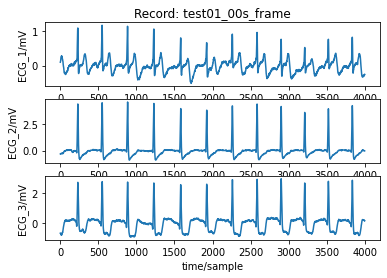

In [30]:
# Demo 8 - Read a WFDB record in which one channel has multiple samples/frame. Return a smoothed uniform array.
# Demo 8 - Đọc một bản ghi WFDB trong đó có một kênh có nhiều mẫu/khung. Trả về một mảng đồng nhất đã được làm trơn
record = wfdb.rdrecord('wfdb-python/sample-data/test01_00s_frame')
wfdb.plot_wfdb(record)

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

## Demo 9

In [32]:
# Demo 9 - Đọc một bản ghi WFDB mà có một kênh có nhiều mẫu/khung. Trả về danh sách tất cả các mẫu dữ liệu
record = wfdb.rdrecord('wfdb-python/sample-data/test01_00s_frame', smooth_frames=False)

display(record.e_p_signal)
# Mô tả chiều dài khác biệt giữa các kênh. Kênh 1 có 2 mẫu/khung, do đó có nhiều gấp 2 lần số mẫu.
print([len(s) for s in record.e_p_signal])

# wfdb.plotrec doesn't work because the Record object is missing its p_signals field.

[array([ 0.1 ,  0.11,  0.13, ..., -0.27, -0.27, -0.26]),
 array([-0.08, -0.57, -0.06, ...,  0.13, -0.18,  0.12]),
 array([-0.66, -0.66, -0.67, ...,  0.15,  0.15,  0.16])]

[4000, 8000, 4000]


## Xuất bản ghi và ghi chú ra ổ đĩa 

In [37]:
# Demo 10- Đọc một bản ghi WFDB mẫu và tạo bản sao qua phương thức wrsamp() đối với một đối tượng bản ghi. 

# Rọc một bản ghi dưới dạng một đối tượng bản ghi
record = wfdb.rdrecord('wfdb-python/sample-data/100', physical=False)
record.record_name = '100x'

# Call the instance method of the object
# Gọi phương thức cho đối tượng
record.wrsamp()

#Đọc tệp mới tạo có tên 100x 
record_x = wfdb.rdrecord('100x')


# Xóa các tệp vừa tạo
#os.remove('100x.hea')
#os.remove('100.dat')

## Demo 11 

In [38]:
# Đây là cách cơ bản để ghi các tín hiệu vật lý thành tệp WFDB.

# Đọc một phần của bản ghi từ Physionet
sig, fields = wfdb.rdsamp('a103l', sampfrom=50000, channels=[0,1], pn_dir='challenge-2015/training')


# Gọi hàm wrsamp, chèn các trường một cách thủ công dưới dạng hàm với các tham số đầu vào
wfdb.wrsamp('ecg-record', fs=250, units=['mV', 'mV'], sig_name=['I', 'II'], p_signal=sig, fmt=['16', '16'])

# Kiểm tra tập tin mới có thể đọc vào lại
record = wfdb.rdrecord('ecg-record')

# Xóa các tệp vừa tạo
# os.remove('ecg-record.hea')
# os.remove('ecg-record.dat')

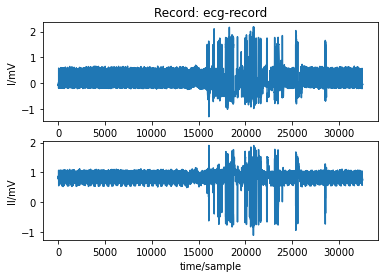

In [39]:
# Vẽ dữ liệu từ bản ghi vừa đọc vào lại
wfdb.plot_wfdb(record)

## Demo 12

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath


import wfdb

In [41]:
# Demo 12 - Ghi ra một bản ghi WFDB có một kênh có nhiều mẫu/khung

# Đọc vào một bản ghi dưới dạng một đối tượng bản ghi
record = wfdb.rdrecord('wfdb-python/sample-data/test01_00s_frame', physical=False, smooth_frames=False)
record.record_name = 'test01_00s_framex'

# Call the instance method of the object with expanded=True to write the record using the e_d_signal field
# Gọi phương thức ghi đối tượng với lựa chọn expanded=True sử dụng trường e_d_signal
record.wrsamp(expanded=True)


# Tệp mới đọc vào lại chương trình sau khi ghi ra
recordx = wfdb.rdrecord('test01_00s_framex')

# Xóa các tệp vừa tạo
# os.remove('test01_00s_framex.hea')
# os.remove('test01_00s.dat')

## Demo 13

In [44]:
# Demo 13 - Đọc một ghi chú WFDB và tạo bản sao qua phương thức wrann() cho đối tượng chú thích

# Đọc một ghi chú thừ Physionet
annotation = wfdb.rdann('wfdb-python/sample-data/100', 'atr')
annotation.extension = 'cpy'

# Gọi phương thức cho đối tượng
annotation.wrann()

#Đọc vào lại tập tin vừa tạo
annotation_copy = wfdb.rdann('100', 'cpy')

# Xóa tập tin vừa tạo
# os.remove('100.cpy')

## Demo 14

In [46]:
# Demo 14 - Ghi ra một tập tin chú thích WFDB không sử dụng đối tượng chú thích 
# thông qua hàm wrann

# Đọc một chú thích làm thành một đối tượng chú thích
annotation = wfdb.rdann('b001', 'atr', pn_dir='cebsdb')

# Gọi hàm wrann, chèn các trường một cách thủ công dưới dạng các tham số đầu vào của hàm
wfdb.wrann('b001', 'cpy', annotation.sample, annotation.symbol)

# Đọc vào lại tập tin mới vừa tạo
annotation_copy = wfdb.rdann('b001', 'cpy')

# Xóa các tệp vừa tạo
# os.remove('b001.cpy')

## Demo 15

In [47]:
# Demo 15 - Xem các nhãn chú thích WFDB chuẩn
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

# Tải nội dung từ Physionet


*   Tải qua địa chỉ mạng http
*   Xem các ví dụ mẫu ở trên để đọc các tập tin dữ liệu chuỗi WFDB lưu trên Physionet không cần tải về ổ đĩa cục bộ
*   PhysioNet có các module rsync để tải toàn bộ cơ sở dữ liệu cho người sử dụng





In [48]:
# Demo 16 - Danh sách cơ sở dữ liệu PhysioNet

dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['butqdb', 'Brno University of Technology ECG Quality Database (BUT QDB)'],
 ['capslpdb', 'CAP Sleep Database'],
 ['cdb', 'MIT-BIH ECG Compression Test Database'],
 ['cded', 'Cerebromicrovascular Disease in Elderly with Diabetes'],
 ['cebsdb', 'Combined measurement of ECG, Breathing and Seismocardiograms'],
 ['ce

## Demo 17

In [49]:
# Demo 17 - Tải tất cả các bản ghi WFDB và chú thích từ một cơ sở dữ liệu PhysioNet

# Tạo một thư mục tạm để lưu dữ liệu tải về trong thư mục làm việc hiện tại
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Tải tất cả nội dung WFDB
wfdb.dl_database('ahadb', dl_dir=dl_dir)

# Hiển thị nội dung đã tải vào thư mục tạm
display(os.listdir(dl_dir))

# Xóa tất cả thư mục vừa tải về 
# shutil.rmtree(dl_dir)

Generating record list for: 0001
Generating record list for: 0201
Generating list of all files for: 0001
Generating list of all files for: 0201
Created local base download directory: /content/tmp_dl_dir
Finished downloading files


['0201.hea', '0001.dat', '0201.dat', '0001.atr', '0001.hea', '0201.atr']

## Demo 18

In [50]:
# Demo 18 - Tải các tập tin cụ thể từ cơ sở dữ liệu PhysioNet

# Các tập tin sẽ tải về
file_list = ['STAFF-Studies-bibliography-2016.pdf',
             'data/001a.hea',
             'data/001a.dat',
             'data/001b.hea',
             'data/001b.dat']
# Tạo một thư mục tạm để tải về trong thư mục làm việc hiện tại
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Tải danh sách tập tin đã liệt kê
wfdb.dl_files('staffiii', dl_dir, file_list)

# Hiển thị nội dung thư mục vừa tải về

display(os.listdir(dl_dir))
display(os.listdir(os.path.join(dl_dir, 'data')))

# Xóa tất cả thư mục vừa tải về 
# shutil.rmtree(dl_dir)

Finished downloading files


['0201.hea',
 '0001.dat',
 'data',
 '0201.dat',
 '0001.atr',
 '0001.hea',
 'STAFF-Studies-bibliography-2016.pdf',
 '0201.atr']

['001b.dat', '001b.hea', '001a.hea', '001a.dat']

# Xử lý dữ liệu ECG

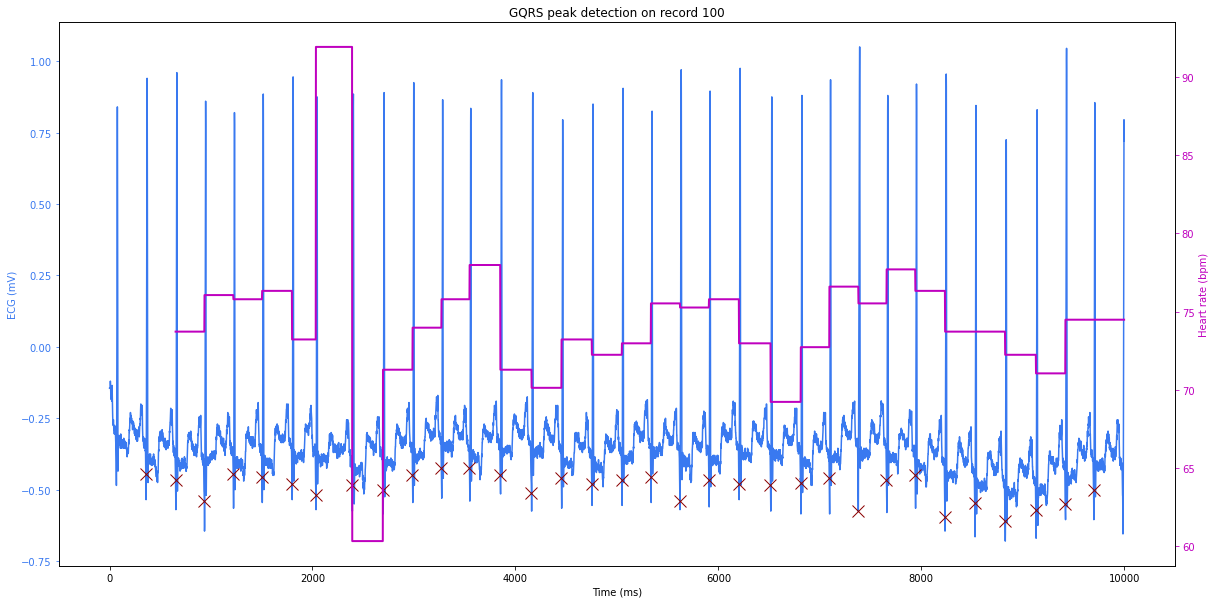

Corrected GQRS detected peak indices: [370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560, 3863, 4171, 4466, 4765, 5061, 5347, 5634, 5919, 6215, 6527, 6824, 7106, 7393, 7670, 7953, 8246, 8539, 8837, 9142, 9432, 9710]


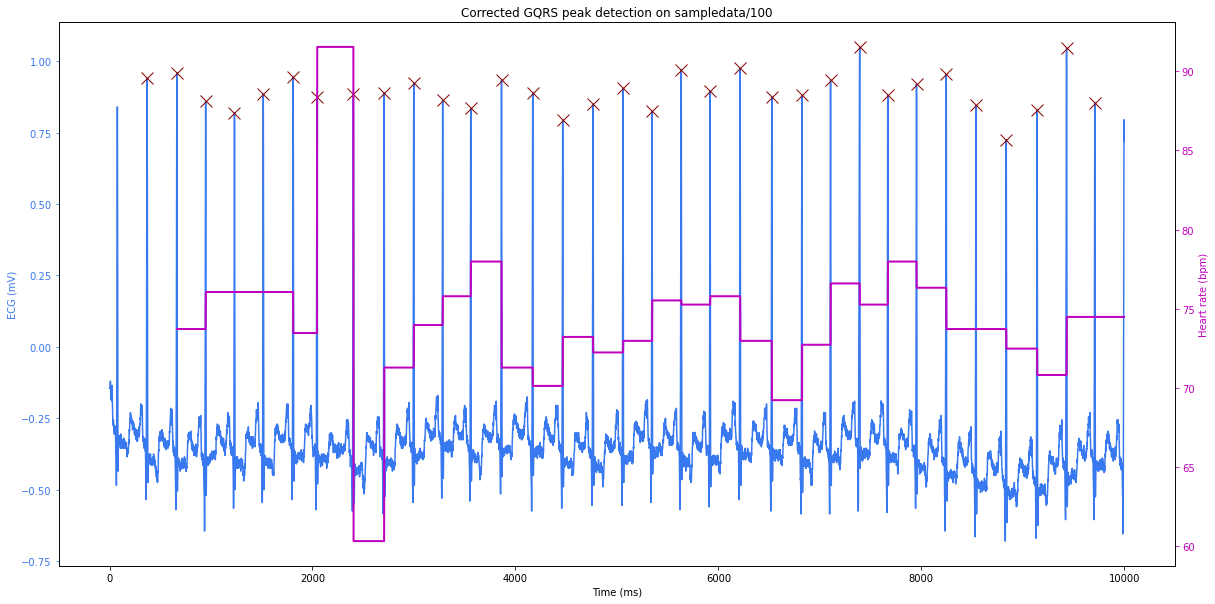

In [54]:
import wfdb
from wfdb import processing
# Demo 19 - Use the GQRS detection algorithm and correct the peaks
# Demo 19 - Sử dụng giải thuật tìm GQRS và xác định các đỉnh

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    
    # Tính nhịp tim
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Tạo nhãn cho trục y, chia độ và dán nhãn phù hợp màu đường biểu diễn.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Tải bản ghi WFDB và các mẫu tín hiệu
record = wfdb.rdrecord('wfdb-python/sample-data/100', sampfrom=0, sampto=10000, channels=[0])


# Sử dụng giải thuật GQRS để phát hiện vị trí QRS trong kênh đầu tiên
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Vẽ các kết quả
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Điều chỉnh vị trí các đỉnh bằng cách dịch chuyển về các vị trí cực đại cục bộ
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Dùng bpm khả dĩ cực đại làm khoảng cách để tìm kiếm
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Hiển thị các kết quả
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")

## Demo 20

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
51 reference annotations, 51 test annotations

True Positives (matched samples): 51
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (51/51)
Positive Predictivity: 1.0000 (51/51)


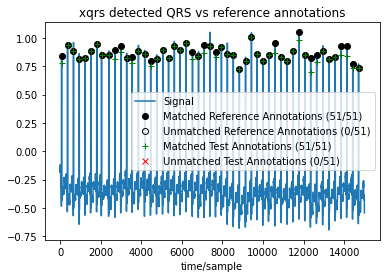

In [55]:
# Demo 20 - Sử dụng các giải thuật XQRS và so sánh các kết quả với các chú thích tham chiếu
import wfdb
from wfdb import processing
sig, fields = wfdb.rdsamp('wfdb-python/sample-data/100', channels=[0], sampto=15000)
ann_ref = wfdb.rdann('wfdb-python/sample-data/100','atr', sampto=15000)


# Chạy hàm tìm QRS trên tín hiệu
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()

# Cách khác, sử dụng hàm để lấy các chỉ số QRS trực tiếp
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# So sánh các phức hợp QRS với các chú thích tham khảo
# Lưu ý, mẫu đầu tiên trong 100.atr không phải là một QRS
comparitor = processing.compare_annotations(ref_sample=ann_ref.sample[1:],
                                            test_sample=xqrs.qrs_inds,
                                            window_width=int(0.1 * fields['fs']),
                                            signal=sig[:,0])

# In và vẽ ra các kết quả
comparitor.print_summary()
comparitor.plot(title='xqrs detected QRS vs reference annotations')

In [56]:
# Don dẹp tất cả các demo
for file in ['100x.hea', '100.dat',  # demo 10
             'ecg-record.hea', 'ecg-record.dat',  # demo 11 
             'test01_00s_framex.hea', 'test01_00s.dat',  # demo 12
             '100.cpy',  # demo 13
             'b001.cpy',  # demo 14
            ]:
    if os.path.isfile(file):
        os.remove(file)

dl_dir = os.path.join(cwd, 'tmp_dl_dir')  # demo 17, 18
if os.path.isdir(dl_dir):
    shutil.rmtree(dl_dir)

In [58]:
import wfdb
record_no_skew = wfdb.rdrecord('wfdb-python/sample-data/test01_00s_skewframe',
                               physical=False,
                               smooth_frames=False, ignore_skew=True)
record_no_skew.wrsamp(expanded=True)

In [59]:
import numpy as np
int_types = (int, np.int64, np.int32, np.int16, np.int8)

int_types[0]('10')

10